In [1]:
!pip install selenium

   ---------------------------------------- 9.5/9.5 MB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 467.2/467.2 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 58.3/58.3 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: sniffio
    Found existing installation: sniffio 1.2.0
    Uninstalling sniffio-1.2.0:
      Successfully uninstalled sniffio-1.2.0
  Attempting uninstall: attrs
    Found existing installation: attrs 21.4.0
    Uninstalling attrs-21.4.0:
      Successfully uninstalled attrs-21.4.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


# IMPORT DEPENDENCIES

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle
from selenium import webdriver
from selenium.webdriver.support.ui import Select
driver = webdriver.Chrome()


In [2]:
from selenium.webdriver.common.by import By # selenium is used as there is dropdown in the website so it has to be open dinamically

In [10]:
url = 'https://live.bible.is/bible/hindpi/mat/1'
driver.get(url)

In [11]:
dropdown_element = driver.find_element(By.ID, "chapter-dropdown-button")

In [12]:
dropdown_element.click() #clicking the dropdown menu to open that.

In [13]:
html_content = driver.page_source

# Parse HTML using Beautiful Soup
soup = BeautifulSoup(html_content, 'html.parser')


In [14]:
#function to make soup for a particular page
def url_to_transcript(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page, "html.parser")
    return soup

In [15]:
links =[a['href'] for a in soup.find_all('a', class_='chapter-box', href=True)]

In [16]:
#Find new testament , then it that find links given for all the chapters.
h3_element = soup.find('h3', string='New Testament')
links = [a['href'] for a in h3_element.find_all_next('a',class_='chapter-box', href=True)]

In [17]:
print(links)

['/bible/HINDPI/MAT/2', '/bible/HINDPI/MAT/3', '/bible/HINDPI/MAT/4', '/bible/HINDPI/MAT/5', '/bible/HINDPI/MAT/6', '/bible/HINDPI/MAT/7', '/bible/HINDPI/MAT/8', '/bible/HINDPI/MAT/9', '/bible/HINDPI/MAT/10', '/bible/HINDPI/MAT/11', '/bible/HINDPI/MAT/12', '/bible/HINDPI/MAT/13', '/bible/HINDPI/MAT/14', '/bible/HINDPI/MAT/15', '/bible/HINDPI/MAT/16', '/bible/HINDPI/MAT/17', '/bible/HINDPI/MAT/18', '/bible/HINDPI/MAT/19', '/bible/HINDPI/MAT/20', '/bible/HINDPI/MAT/21', '/bible/HINDPI/MAT/22', '/bible/HINDPI/MAT/23', '/bible/HINDPI/MAT/24', '/bible/HINDPI/MAT/25', '/bible/HINDPI/MAT/26', '/bible/HINDPI/MAT/27', '/bible/HINDPI/MAT/28', '/bible/HINDPI/MRK/1', '/bible/HINDPI/MRK/2', '/bible/HINDPI/MRK/3', '/bible/HINDPI/MRK/4', '/bible/HINDPI/MRK/5', '/bible/HINDPI/MRK/6', '/bible/HINDPI/MRK/7', '/bible/HINDPI/MRK/8', '/bible/HINDPI/MRK/9', '/bible/HINDPI/MRK/10', '/bible/HINDPI/MRK/11', '/bible/HINDPI/MRK/12', '/bible/HINDPI/MRK/13', '/bible/HINDPI/MRK/14', '/bible/HINDPI/MRK/15', '/bible/

In [18]:
#just add the 1st link because I access the page in the first link, so it has to be added also.
link1=[url]+links
print(link1)

['https://live.bible.is/bible/hindpi/mat/1', '/bible/HINDPI/MAT/2', '/bible/HINDPI/MAT/3', '/bible/HINDPI/MAT/4', '/bible/HINDPI/MAT/5', '/bible/HINDPI/MAT/6', '/bible/HINDPI/MAT/7', '/bible/HINDPI/MAT/8', '/bible/HINDPI/MAT/9', '/bible/HINDPI/MAT/10', '/bible/HINDPI/MAT/11', '/bible/HINDPI/MAT/12', '/bible/HINDPI/MAT/13', '/bible/HINDPI/MAT/14', '/bible/HINDPI/MAT/15', '/bible/HINDPI/MAT/16', '/bible/HINDPI/MAT/17', '/bible/HINDPI/MAT/18', '/bible/HINDPI/MAT/19', '/bible/HINDPI/MAT/20', '/bible/HINDPI/MAT/21', '/bible/HINDPI/MAT/22', '/bible/HINDPI/MAT/23', '/bible/HINDPI/MAT/24', '/bible/HINDPI/MAT/25', '/bible/HINDPI/MAT/26', '/bible/HINDPI/MAT/27', '/bible/HINDPI/MAT/28', '/bible/HINDPI/MRK/1', '/bible/HINDPI/MRK/2', '/bible/HINDPI/MRK/3', '/bible/HINDPI/MRK/4', '/bible/HINDPI/MRK/5', '/bible/HINDPI/MRK/6', '/bible/HINDPI/MRK/7', '/bible/HINDPI/MRK/8', '/bible/HINDPI/MRK/9', '/bible/HINDPI/MRK/10', '/bible/HINDPI/MRK/11', '/bible/HINDPI/MRK/12', '/bible/HINDPI/MRK/13', '/bible/HIND

In [19]:
#Links are given incomplete in the html so adding https to them.
link2=[]
for l in link1:
    if not l.startswith('https://live.bible.is'):
        l='https://live.bible.is'+l
    link2.append(l)
print(link2)

['https://live.bible.is/bible/hindpi/mat/1', 'https://live.bible.is/bible/HINDPI/MAT/2', 'https://live.bible.is/bible/HINDPI/MAT/3', 'https://live.bible.is/bible/HINDPI/MAT/4', 'https://live.bible.is/bible/HINDPI/MAT/5', 'https://live.bible.is/bible/HINDPI/MAT/6', 'https://live.bible.is/bible/HINDPI/MAT/7', 'https://live.bible.is/bible/HINDPI/MAT/8', 'https://live.bible.is/bible/HINDPI/MAT/9', 'https://live.bible.is/bible/HINDPI/MAT/10', 'https://live.bible.is/bible/HINDPI/MAT/11', 'https://live.bible.is/bible/HINDPI/MAT/12', 'https://live.bible.is/bible/HINDPI/MAT/13', 'https://live.bible.is/bible/HINDPI/MAT/14', 'https://live.bible.is/bible/HINDPI/MAT/15', 'https://live.bible.is/bible/HINDPI/MAT/16', 'https://live.bible.is/bible/HINDPI/MAT/17', 'https://live.bible.is/bible/HINDPI/MAT/18', 'https://live.bible.is/bible/HINDPI/MAT/19', 'https://live.bible.is/bible/HINDPI/MAT/20', 'https://live.bible.is/bible/HINDPI/MAT/21', 'https://live.bible.is/bible/HINDPI/MAT/22', 'https://live.bibl

In [20]:
len(link2)

260

In [21]:
#trying to access content of 1 page.
all_items = soup.find_all('span',class_='align-left')

for item in all_items:
    print(item.text)

 1 अब्राहम की सन्तान, दाऊद की सन्तान, यीशु मसीह की वंशावली।
 2 अब्राहम से इसहाक उत्पन्न हुआ, इसहाक से याकूब उत्पन्न हुआ, और याकूब से यहूदा और उसके भाई उत्पन्न हुए।
 3 यहूदा और तामार से पेरेस व जेरह उत्पन्न हुए, और पेरेस से हेस्रोन उत्पन्न हुआ, और हेस्रोन से एराम उत्पन्न हुआ।
 4 एराम से अम्मीनादाब उत्पन्न हुआ, और अम्मीनादाब से नहशोन, और नहशोन से सलमोन उत्पन्न हुआ। (रूत 4:19,20)
 5 सलमोन और राहाब से बोअज उत्पन्न हुआ, और बोअज और रूत से ओबेद उत्पन्न हुआ, और ओबेद से यिशै उत्पन्न हुआ।
 6 और यिशै से दाऊद राजा उत्पन्न हुआ। और दाऊद से सुलैमान उस स्त्री से उत्पन्न हुआ जो पहले ऊरिय्याह की पत्नी थी। (2 शमू. 12:24)
 7 सुलैमान से रहबाम उत्पन्न हुआ, और रहबाम से अबिय्याह उत्पन्न हुआ, और अबिय्याह से आसा उत्पन्न हुआ।
 8 आसा से यहोशाफात उत्पन्न हुआ, और यहोशाफात से योराम उत्पन्न हुआ, और योराम से उज्जियाह उत्पन्न हुआ।
 9 उज्जियाह से योताम उत्पन्न हुआ, योताम से आहाज उत्पन्न हुआ, और आहाज से हिजकिय्याह उत्पन्न हुआ।
 10 हिजकिय्याह से मनश्शे उत्पन्न हुआ, मनश्शे से आमोन उत्पन्न हुआ, और आमोन से योशिय्याह उत्पन्न 

In [23]:
import time
all_items=[] #initializes the list 
j = 0
max_retries = 3 # links are repeatedly opening so some errors are seen in opening the link repeatedly, so it tries at most 3 time to open a link
retry_count = 0
for i in link2:
    j+=1
    tc = url_to_transcript(i).find_all('span', class_='align-left')
    time.sleep(10) 
    print(j + 1)
    print(tc)
    
    if not tc and retry_count < max_retries:
        retry_count += 1
        time.sleep(10)  
        continue  
    
    retry_count = 0 
    
    all_items.append(tc)
    time.sleep(10)  


1
[<span class="align-left" data-verseid="1" style="background:linear-gradient(inherit,inherit)"><sup data-verseid="1"> <!-- -->1<!-- --> </sup><span data-verseid="1">अब्राहम की सन्तान, दाऊद की सन्तान, यीशु मसीह की वंशावली।</span></span>, <span class="align-left" data-verseid="2" style="background:linear-gradient(inherit,inherit)"><sup data-verseid="2"> <!-- -->2<!-- --> </sup><span data-verseid="2">अब्राहम से इसहाक उत्पन्न हुआ, इसहाक से याकूब उत्पन्न हुआ, और याकूब से यहूदा और उसके भाई उत्पन्न हुए।</span></span>, <span class="align-left" data-verseid="3" style="background:linear-gradient(inherit,inherit)"><sup data-verseid="3"> <!-- -->3<!-- --> </sup><span data-verseid="3">यहूदा और तामार से पेरेस व जेरह उत्पन्न हुए, और पेरेस से हेस्रोन उत्पन्न हुआ, और हेस्रोन से एराम उत्पन्न हुआ।</span></span>, <span class="align-left" data-verseid="4" style="background:linear-gradient(inherit,inherit)"><sup data-verseid="4"> <!-- -->4<!-- --> </sup><span data-verseid="4">एराम से अम्मीनादाब उत्पन्न हु

In [36]:
#some index doesnot open by above code, so open them seperately by inserting indexes of them in a list
indx=[1,2,14,15,16,19,28,29,32,33,34,39,41,42,43,44,46,47,54,57,58,61,62,72,83,84,86,97,98,99,100,102,113,117,118,127,129,130,141,144,145,146,153,154,160,167,168,169,187,201,210,224,237,241,242,252]

In [43]:
len(all_items)

225

In [62]:
#Nothing but process for opening the missing indexes that doesnot open earlier.
ind=[0,1,251,252,253,254,255,256,257,258,259]

In [63]:
j=0
while j<11:
    print(j+1)
    max_retries = 3
    retry_count = 0
    tc = url_to_transcript(link2[ind[j]]).find_all('span', class_='align-left')
    time.sleep(10) 
    print(tc)
    
    if not tc and retry_count < max_retries:
        retry_count += 1
        time.sleep(10)  
        continue  
    
    retry_count = 0
    print(ind[j])
    all_items.insert(ind[j],tc)
    time.sleep(10)
    print('\n\n\n\n\n\n\n')
    j+=1

1
[<span class="align-left" data-verseid="1" style="background:linear-gradient(inherit,inherit)"><sup data-verseid="1"> <!-- -->1<!-- --> </sup><span data-verseid="1">अब्राहम की सन्तान, दाऊद की सन्तान, यीशु मसीह की वंशावली।</span></span>, <span class="align-left" data-verseid="2" style="background:linear-gradient(inherit,inherit)"><sup data-verseid="2"> <!-- -->2<!-- --> </sup><span data-verseid="2">अब्राहम से इसहाक उत्पन्न हुआ, इसहाक से याकूब उत्पन्न हुआ, और याकूब से यहूदा और उसके भाई उत्पन्न हुए।</span></span>, <span class="align-left" data-verseid="3" style="background:linear-gradient(inherit,inherit)"><sup data-verseid="3"> <!-- -->3<!-- --> </sup><span data-verseid="3">यहूदा और तामार से पेरेस व जेरह उत्पन्न हुए, और पेरेस से हेस्रोन उत्पन्न हुआ, और हेस्रोन से एराम उत्पन्न हुआ।</span></span>, <span class="align-left" data-verseid="4" style="background:linear-gradient(inherit,inherit)"><sup data-verseid="4"> <!-- -->4<!-- --> </sup><span data-verseid="4">एराम से अम्मीनादाब उत्पन्न हु

In [72]:
len(all_items)

260

In [75]:
#store all the text in seperate files based on chapters, so total 260 text files are made.
import os
folder_path=r"C:\Users\Sahil\Downloads\audio\chapter_text"
k=0
while k < 260:
    filename = os.path.join(folder_path, f"ch{k + 1}.txt")
    with open(filename, 'a', encoding='utf-8') as f:  
        for item in all_items[k]:
            f.write(item.text + '\n')  
    k += 1

In [33]:
link2[17]

'https://live.bible.is/bible/HINDPI/MAT/18'

In [15]:
#similar to text files, audio links are also in drop down menu, so similar approach of opening them dinamically.
import time
max_retries = 3 #max 3 attempts to open a link
audio_list=[]
c=0
for i in link2:
    retry_count = 0
    print(c+1)
    c+=1
    driver2 = webdriver.Chrome()
    time.sleep(10)
    while retry_count < max_retries:
      driver2.get(i)
      time.sleep(10)
      dropdown_element2 = driver2.find_element(By.CLASS_NAME, "content-container")
      time.sleep(10)
      dropdown_element2.click()
      time.sleep(10)                 
      html_content = driver2.page_source
      soup = BeautifulSoup(html_content, 'html.parser')
      tc = soup.find('video', class_='audio-player')
      print(tc)
      if tc is not None:
            break
      retry_count += 1
      time.sleep(10)
    if tc:
      audio_src = tc.get('src')
      audio_list.append(audio_src)
      driver2.quit()
      time.sleep(10)

1
None
<video class="audio-player" data-src="source-https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B01___01_Matthew_____HINBCSN1DA.mp3?x-amz-transaction=4274659&amp;Expires=1715816132&amp;Signature=WaVJlEfZy1k6sTQ~H-Zn5ANjSleRocXwq5ltzsPAHKeg0JQsZMWnOxFtrNuq1KFmSwNrZoP0LqyQIkm9Mf3xF1ZIqn6SM7QXScUOjOpNiT4bIEn54yC6uLm6Yyp0PMXYlTKzGy2BAk6CUJe8BL-OUVgIhgCeO-txZZSWpV9xVOy~CS2GCR34Mq9ViNLhFGaNSVEd67oDv01YiXpOTiuV-Wm-bm2rRGF-nizKrors3Dbg68iQKr7jKtbqheAG-vZFBrziG4QeAO6ViV6dUYSrYU34fYf2sW1dc8eBUYfmoZZajEcLeyqcRuKjOwUYim93D9gLDdlyLynbPLZoCPTMEQ__&amp;Key-Pair-Id=APKAI4ULLVMANLYYPTLQ-https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B01___01_Matthew_____HINBCSN1DA.mp3?x-amz-transaction=4274659&amp;Expires=1715816132&amp;Signature=WaVJlEfZy1k6sTQ~H-Zn5ANjSleRocXwq5ltzsPAHKeg0JQsZMWnOxFtrNuq1KFmSwNrZoP0LqyQIkm9Mf3xF1ZIqn6SM7QXScUOjOpNiT4bIEn54yC6uLm6Yyp0PMXYlTKzGy2BAk6CUJe8BL-OUVgIhgCeO-txZZSWpV9xVOy~CS2GCR34Mq9ViNLhFGaNSVEd67oDv01YiXpOTiuV-Wm-bm2rRGF-nizKrors3Dbg68iQKr7j

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".content-container"}
  (Session info: chrome=124.0.6367.63); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF719EC1522+60802]
	(No symbol) [0x00007FF719E3AC22]
	(No symbol) [0x00007FF719CF7CE4]
	(No symbol) [0x00007FF719D46D4D]
	(No symbol) [0x00007FF719D46E1C]
	(No symbol) [0x00007FF719D8CE37]
	(No symbol) [0x00007FF719D6ABBF]
	(No symbol) [0x00007FF719D8A224]
	(No symbol) [0x00007FF719D6A923]
	(No symbol) [0x00007FF719D38FEC]
	(No symbol) [0x00007FF719D39C21]
	GetHandleVerifier [0x00007FF71A1C41BD+3217949]
	GetHandleVerifier [0x00007FF71A206157+3488183]
	GetHandleVerifier [0x00007FF71A1FF0DF+3459391]
	GetHandleVerifier [0x00007FF719F7B8E6+823622]
	(No symbol) [0x00007FF719E45FBF]
	(No symbol) [0x00007FF719E40EE4]
	(No symbol) [0x00007FF719E41072]
	(No symbol) [0x00007FF719E318C4]
	BaseThreadInitThunk [0x00007FFCDA68257D+29]
	RtlUserThreadStart [0x00007FFCDBE6AA48+40]


In [69]:
len(audio_list)

260

In [24]:
#missing links that are not openned before.
import time
max_retries = 3
c=41
for i in link2[41:]:
    retry_count = 0
    print(c+1)
    c+=1
    driver2 = webdriver.Chrome()
    time.sleep(10)
    while retry_count < max_retries:
      driver2.get(i)
      time.sleep(10)
      dropdown_element2 = driver2.find_element(By.CLASS_NAME, "content-container")
      time.sleep(10)
      dropdown_element2.click()
      time.sleep(10)                 
      html_content = driver2.page_source
      soup = BeautifulSoup(html_content, 'html.parser')
      tc = soup.find('video', class_='audio-player')
      print(tc)
      if tc is not None:
            break
      retry_count += 1
      time.sleep(10)
    if tc:
      audio_src = tc.get('src')
      audio_list.append(audio_src)
      driver2.quit()
      time.sleep(10)

42
<video class="audio-player" data-src="source-https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B02___14_Mark________HINBCSN1DA.mp3?x-amz-transaction=3701371&amp;Expires=1715837908&amp;Signature=XiY6Jnz9Eq8I25KXwuIk8-9RRpJ5KCZImYYAHIvgGKyydQDSMxffY-Jppi70X~TtcjpdagUDGYuUhMApl9ZyKxo9~2bHJtHGg0FhYZFe~eTYxXIYQ5qfv86nKcRmb8BXQA80yNgqjxP1rLe9g-xalQ0zJlM9dX57Pvzj8gujt3vhwuC7EqR--XDWjxF0vhDsmBZCUuKEbsxnoTUM7ZNhutDeIclSAkejmWTVw-pRtHQEdVTmEmMH3BMC4~qut8g61gFQXpYMU5CGLaU8VnYrPRYmu6qEdEbSBB7caQN3tP6zkg8-Avu7Ouo-64kXlZhjjHq7vkCKunim6Dvj3nblEg__&amp;Key-Pair-Id=APKAI4ULLVMANLYYPTLQ-https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B02___14_Mark________HINBCSN1DA.mp3?x-amz-transaction=3701371&amp;Expires=1715837908&amp;Signature=XiY6Jnz9Eq8I25KXwuIk8-9RRpJ5KCZImYYAHIvgGKyydQDSMxffY-Jppi70X~TtcjpdagUDGYuUhMApl9ZyKxo9~2bHJtHGg0FhYZFe~eTYxXIYQ5qfv86nKcRmb8BXQA80yNgqjxP1rLe9g-xalQ0zJlM9dX57Pvzj8gujt3vhwuC7EqR--XDWjxF0vhDsmBZCUuKEbsxnoTUM7ZNhutDeIclSAkejmWTVw-pRtHQEdVTmEmMH3BMC

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".content-container"}
  (Session info: chrome=124.0.6367.63); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF719EC1522+60802]
	(No symbol) [0x00007FF719E3AC22]
	(No symbol) [0x00007FF719CF7CE4]
	(No symbol) [0x00007FF719D46D4D]
	(No symbol) [0x00007FF719D46E1C]
	(No symbol) [0x00007FF719D8CE37]
	(No symbol) [0x00007FF719D6ABBF]
	(No symbol) [0x00007FF719D8A224]
	(No symbol) [0x00007FF719D6A923]
	(No symbol) [0x00007FF719D38FEC]
	(No symbol) [0x00007FF719D39C21]
	GetHandleVerifier [0x00007FF71A1C41BD+3217949]
	GetHandleVerifier [0x00007FF71A206157+3488183]
	GetHandleVerifier [0x00007FF71A1FF0DF+3459391]
	GetHandleVerifier [0x00007FF719F7B8E6+823622]
	(No symbol) [0x00007FF719E45FBF]
	(No symbol) [0x00007FF719E40EE4]
	(No symbol) [0x00007FF719E41072]
	(No symbol) [0x00007FF719E318C4]
	BaseThreadInitThunk [0x00007FFCDA68257D+29]
	RtlUserThreadStart [0x00007FFCDBE6AA48+40]


In [29]:
# missing links that are not opened before.
import time
max_retries = 3
c=130
for i in link2[131:]:
    retry_count = 0
    print(c+1)
    c+=1
    driver2 = webdriver.Chrome()
    time.sleep(10)
    while retry_count < max_retries:
      driver2.get(i)
      time.sleep(10)
      dropdown_element2 = driver2.find_element(By.CLASS_NAME, "content-container")
      time.sleep(10)
      dropdown_element2.click()
      time.sleep(10)                 
      html_content = driver2.page_source
      soup = BeautifulSoup(html_content, 'html.parser')
      tc = soup.find('video', class_='audio-player')
      print(tc)
      if tc is not None:
            break
      retry_count += 1
      time.sleep(10)
    if tc:
      audio_src = tc.get('src')
      audio_list.append(audio_src)
      driver2.quit()
      time.sleep(10)

131
None
<video class="audio-player" data-src="source-https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B06___15_Romans______HINBCSN1DA.mp3?x-amz-transaction=4715162&amp;Expires=1715838806&amp;Signature=E16cU-~NW5ym2iGuo0BErUwymrAHr2dx8b1Jd2LUYrJywwoD3iSJAaNfgkJfHtvZsKS~KYEUXRpuk8qvzxFCNozGrZbzOfECZ-D3TOJkCENmwZubIv~UdcXc-cwV1H9XFRZmLtKe8wNZvszKe1JKRR2Mi4b9efS1WFVQhQ~O0RHNvNpRcOva27s9YKpfavh6etEfOBI0yse2pFpVpXiy6UmrNlWzr8X-Xt2s8ownQDKYzacL5wNidY-0hWZXzFwpRfDNiR53RuJ-bfadekxSWpzZ2r34ocGtNZ-rz0f2LsZExqt-9D1lP1cPoWyhNxX1Rj7HMMd3NEv~YXtF48McBw__&amp;Key-Pair-Id=APKAI4ULLVMANLYYPTLQ-https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B06___15_Romans______HINBCSN1DA.mp3?x-amz-transaction=4715162&amp;Expires=1715838806&amp;Signature=E16cU-~NW5ym2iGuo0BErUwymrAHr2dx8b1Jd2LUYrJywwoD3iSJAaNfgkJfHtvZsKS~KYEUXRpuk8qvzxFCNozGrZbzOfECZ-D3TOJkCENmwZubIv~UdcXc-cwV1H9XFRZmLtKe8wNZvszKe1JKRR2Mi4b9efS1WFVQhQ~O0RHNvNpRcOva27s9YKpfavh6etEfOBI0yse2pFpVpXiy6UmrNlWzr8X-Xt2s8ownQDKYzacL5w

In [70]:
a=audio_list
len(a) 

260

In [71]:
len(audio_list)

260

In [72]:
a

['https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B01___01_Matthew_____HINBCSN1DA.mp3?x-amz-transaction=4274659&Expires=1715816132&Signature=WaVJlEfZy1k6sTQ~H-Zn5ANjSleRocXwq5ltzsPAHKeg0JQsZMWnOxFtrNuq1KFmSwNrZoP0LqyQIkm9Mf3xF1ZIqn6SM7QXScUOjOpNiT4bIEn54yC6uLm6Yyp0PMXYlTKzGy2BAk6CUJe8BL-OUVgIhgCeO-txZZSWpV9xVOy~CS2GCR34Mq9ViNLhFGaNSVEd67oDv01YiXpOTiuV-Wm-bm2rRGF-nizKrors3Dbg68iQKr7jKtbqheAG-vZFBrziG4QeAO6ViV6dUYSrYU34fYf2sW1dc8eBUYfmoZZajEcLeyqcRuKjOwUYim93D9gLDdlyLynbPLZoCPTMEQ__&Key-Pair-Id=APKAI4ULLVMANLYYPTLQ',
 'https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B01___02_Matthew_____HINBCSN1DA.mp3?x-amz-transaction=2727670&Expires=1715833466&Signature=Vyj1Ub3BAR99T4iz2Eewg70s113-RXi91SvMAtAQ~5cNUUtTKSDWaaBD64s0rAs-shkPG4mZ-ii-JUgE0E~xtElXW8uFenPihuFCyyRX3kL~N5AeTOwv9cClMsY12Az-ynLMLC3jtn-OcYGvRkx789dMEYL102av1Ubf1DRwv6zgGeURW~bhc8bAeJqiMflACI3HR0qUl9FHmE~aFmB9czhE2mFZP1j-BCmaY83M1D6ptkx-78ocWzg96UFZY9f0JUeYSCwCwljZkn2Ymb6I01Owde-n~NnQTfoN2i4amlQ7OIctiGfj8q

In [38]:
#missing links that are not opened before because repeatedly opening tabs dynamically might create some issues.
new_list=[]
idx=[6,17,30,35,44,47,64,84,105,130,148,210,212,215,218,230,245]
k=0
while k<len(idx):
    retry_count = 0
    print(k+1)
    c+=1
    driver2 = webdriver.Chrome()
    time.sleep(10)
    while retry_count < max_retries:
      driver2.get(link2[idx[k]])
      time.sleep(10)
      dropdown_element2 = driver2.find_element(By.CLASS_NAME, "content-container")
      time.sleep(10)
      dropdown_element2.click()
      time.sleep(10)                 
      html_content = driver2.page_source
      soup = BeautifulSoup(html_content, 'html.parser')
      tc = soup.find('video', class_='audio-player')
      print(tc)
      if tc is not None:
            break
      retry_count += 1
      time.sleep(10)
    if tc:
      audio_src = tc.get('src')
      new_list.append(audio_src)
      driver2.quit()
      time.sleep(10)
    k+=1

1
<video class="audio-player" data-src="source-https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B01___07_Matthew_____HINBCSN1DA.mp3?x-amz-transaction=9627951&amp;Expires=1715837542&amp;Signature=AFaOY1dZSgQu987Lu97ShQZ6~6JAzVvZBzp2Wi7E1mdF8JIGcsng5WFFKeRjZ0Hp4VN4k2KXoEiQxod6mQXx81aqKTtM80QHSqrUP6M-GHSE4J57s5mQR0KKRtaexoG73X9PtBEXOsxY88XQYBeASByolBFmHxroRBj~s2Ejb1RFTNh~BbvL7oUr1~VdvghROVccEsvtpYqZdcPrU7PA-FrI8DzItRX5zieHL2oxd~dUctp-etWNqDXtVS5zgLLnLfIdoESgjCInLLxnakPwFgY4gJiHqKnXAIr4luOeq~cYuUfGTStx~mnEqYOFhzrCOrYNbJdHQga~LWzsCaNHGw__&amp;Key-Pair-Id=APKAI4ULLVMANLYYPTLQ-https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B01___07_Matthew_____HINBCSN1DA.mp3?x-amz-transaction=9627951&amp;Expires=1715837542&amp;Signature=AFaOY1dZSgQu987Lu97ShQZ6~6JAzVvZBzp2Wi7E1mdF8JIGcsng5WFFKeRjZ0Hp4VN4k2KXoEiQxod6mQXx81aqKTtM80QHSqrUP6M-GHSE4J57s5mQR0KKRtaexoG73X9PtBEXOsxY88XQYBeASByolBFmHxroRBj~s2Ejb1RFTNh~BbvL7oUr1~VdvghROVccEsvtpYqZdcPrU7PA-FrI8DzItRX5zieHL2oxd~dUctp-etWNqDXtV

In [57]:
new_list[4]

'https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B03___01_Luke________HINBCSN1DA.mp3?x-amz-transaction=5159154&Expires=1715877725&Signature=BIiC7SoPWjcvO396uZgp0BGrxQGcqwVO7p6PKbUJpylhJSa53op9Upl9houGmmRIes5d9VzZwXaNtt3PKBs7i1-uh1dsRwjvs8AMKP0TyTPLt1bsu~35FlTt2x3YE9f71sl3CN7SSmcUTMD5EanJZsdPCKllXKYHaQrlG50YfNXShDmJ2bkCmfORRdXWQFih-Vwq0VvQcm4FwvjytPM9zWzDkabzv2BedLILELpkJvUOa-bZ3J--LvgbG018hXqlwLURrscjjqhgTXSWR-0FfrOVuoIlG9fGE0awyeEBctXj9BFWxoW2rz8ccbNZFrorzbSexlsmiarVrtWROWMbUw__&Key-Pair-Id=APKAI4ULLVMANLYYPTLQ'

In [43]:
a1=new_list

In [54]:
#inserting missing links to final audio lists
m=0
for i in idx:
    audio_list.insert(i,new_list[m])
    m+=1

In [58]:
audio_list[44]

'https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B03___01_Luke________HINBCSN1DA.mp3?x-amz-transaction=5159154&Expires=1715877725&Signature=BIiC7SoPWjcvO396uZgp0BGrxQGcqwVO7p6PKbUJpylhJSa53op9Upl9houGmmRIes5d9VzZwXaNtt3PKBs7i1-uh1dsRwjvs8AMKP0TyTPLt1bsu~35FlTt2x3YE9f71sl3CN7SSmcUTMD5EanJZsdPCKllXKYHaQrlG50YfNXShDmJ2bkCmfORRdXWQFih-Vwq0VvQcm4FwvjytPM9zWzDkabzv2BedLILELpkJvUOa-bZ3J--LvgbG018hXqlwLURrscjjqhgTXSWR-0FfrOVuoIlG9fGE0awyeEBctXj9BFWxoW2rz8ccbNZFrorzbSexlsmiarVrtWROWMbUw__&Key-Pair-Id=APKAI4ULLVMANLYYPTLQ'

In [59]:
len(audio_list)

260

In [83]:
a=audio_list
a

['https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B01___01_Matthew_____HINBCSN1DA.mp3?x-amz-transaction=4274659&Expires=1715816132&Signature=WaVJlEfZy1k6sTQ~H-Zn5ANjSleRocXwq5ltzsPAHKeg0JQsZMWnOxFtrNuq1KFmSwNrZoP0LqyQIkm9Mf3xF1ZIqn6SM7QXScUOjOpNiT4bIEn54yC6uLm6Yyp0PMXYlTKzGy2BAk6CUJe8BL-OUVgIhgCeO-txZZSWpV9xVOy~CS2GCR34Mq9ViNLhFGaNSVEd67oDv01YiXpOTiuV-Wm-bm2rRGF-nizKrors3Dbg68iQKr7jKtbqheAG-vZFBrziG4QeAO6ViV6dUYSrYU34fYf2sW1dc8eBUYfmoZZajEcLeyqcRuKjOwUYim93D9gLDdlyLynbPLZoCPTMEQ__&Key-Pair-Id=APKAI4ULLVMANLYYPTLQ',
 'https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B01___02_Matthew_____HINBCSN1DA.mp3?x-amz-transaction=2727670&Expires=1715833466&Signature=Vyj1Ub3BAR99T4iz2Eewg70s113-RXi91SvMAtAQ~5cNUUtTKSDWaaBD64s0rAs-shkPG4mZ-ii-JUgE0E~xtElXW8uFenPihuFCyyRX3kL~N5AeTOwv9cClMsY12Az-ynLMLC3jtn-OcYGvRkx789dMEYL102av1Ubf1DRwv6zgGeURW~bhc8bAeJqiMflACI3HR0qUl9FHmE~aFmB9czhE2mFZP1j-BCmaY83M1D6ptkx-78ocWzg96UFZY9f0JUeYSCwCwljZkn2Ymb6I01Owde-n~NnQTfoN2i4amlQ7OIctiGfj8q

In [61]:
#links to download mp3 files are extracted from the full links that is extracted before.
audio_links=[]
from urllib.parse import urlparse, parse_qs

def extract_mp3_link(url):
    parsed_url = urlparse(url)
    query_params = parse_qs(parsed_url.query)
    mp3_link = parsed_url.scheme + "://" + parsed_url.netloc + parsed_url.path
    return mp3_link

for i in audio_list:
    mp3_link = extract_mp3_link(i)
    audio_links.append(mp3_link)


In [62]:
print(audio_links)

['https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B01___01_Matthew_____HINBCSN1DA.mp3', 'https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B01___02_Matthew_____HINBCSN1DA.mp3', 'https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B01___03_Matthew_____HINBCSN1DA.mp3', 'https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B01___04_Matthew_____HINBCSN1DA.mp3', 'https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B01___05_Matthew_____HINBCSN1DA.mp3', 'https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B01___06_Matthew_____HINBCSN1DA.mp3', 'https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B01___07_Matthew_____HINBCSN1DA.mp3', 'https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B01___08_Matthew_____HINBCSN1DA.mp3', 'https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B01___09_Matthew_____HINBCSN1DA.mp3', 'https://d1gd73roq7kqw6.cloudfront.net/audio/HINDPI/HINBCSN1DA/B01___10_Matthew_____HINBCS

In [63]:
len(audio_links)

260

In [67]:
#extract requires parameters that are in the links to download the mp3 file
from urllib.parse import urlparse, parse_qs
def extract_params_from_url(url):
    parsed_url = urlparse(url)
    query_params = parse_qs(parsed_url.query)
    return query_params

In [68]:
# downloading and saving all audio files one by one 
for i in range(0, 260):
    query_params = extract_params_from_url(audio_list[i])
    params_dict = {}
    for key, value in query_params.items():
        params_dict[key] = value[0]
        
    save_path = r"C:\Users\Sahil\Downloads\audio\audios\audio{}.mp3".format(i+1)
    download_audio(audio_links[i], params=params_dict, save_path=save_path)
    print("Success")

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


In [74]:
# just writing all text file data at one place.
import os
f = r"C:\Users\Sahil\Downloads\audio\text_data"

file_path = os.path.join(f, 'text_file.txt')

with open(file_path, 'w', encoding='utf-8') as file:
    for link in link2:
        tc = url_to_transcript(link).find_all('span', class_='align-left')  
        for item in tc:
            file.write(item.text + '\n')


In [76]:
import csv
text_file_path = r"C:\Users\Sahil\Downloads\audio\text_data\text_file.txt"
csv_file_path = os.path.join(r"C:\Users\Sahil\Downloads\audio\text_data", 'text_file.csv')

with open(text_file_path, 'r', encoding='utf-8') as text_file:
    text_lines = text_file.readlines()

with open(csv_file_path, 'w', encoding='utf-8', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    for line in text_lines:
        csv_writer.writerow([line.strip()])

In [77]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Sahil\Downloads\audio\text_data\text_file.csv")
df.head()

1 अब्राहम की सन्तान, दाऊद की सन्तान, यीशु मसीह की वंशावली।
0  2 अब्राहम से इसहाक उत्पन्न हुआ, इसहाक से याकूब...        
1  3 यहूदा और तामार से पेरेस व जेरह उत्पन्न हुए, ...        
2  4 एराम से अम्मीनादाब उत्पन्न हुआ, और अम्मीनादा...        
3  5 सलमोन और राहाब से बोअज उत्पन्न हुआ, और बोअज ...        
4  6 और यिशै से दाऊद राजा उत्पन्न हुआ। और दाऊद से...

In [78]:
print(df.dtypes)

1 अब्राहम की सन्तान, दाऊद की सन्तान, यीशु मसीह की वंशावली।    object
dtype: object


In [79]:
df=df.astype(str)

In [80]:
print(df.dtypes)

1 अब्राहम की सन्तान, दाऊद की सन्तान, यीशु मसीह की वंशावली।    object
dtype: object


# Remove Numbers

In [81]:
import re
def remove_numbers(text):
    return re.sub(r'\d+', '', str(text))

In [82]:
df = df.applymap(remove_numbers)

In [83]:
df.head()

1 अब्राहम की सन्तान, दाऊद की सन्तान, यीशु मसीह की वंशावली।
0   अब्राहम से इसहाक उत्पन्न हुआ, इसहाक से याकूब ...        
1   यहूदा और तामार से पेरेस व जेरह उत्पन्न हुए, औ...        
2   एराम से अम्मीनादाब उत्पन्न हुआ, और अम्मीनादाब...        
3   सलमोन और राहाब से बोअज उत्पन्न हुआ, और बोअज औ...        
4   और यिशै से दाऊद राजा उत्पन्न हुआ। और दाऊद से ...

# Remove Undesirable characters

In [84]:
chars_to_remove = ',()"|?:.!-;\n\t'
df = df.apply(lambda x: x.str.replace(f'[{chars_to_remove}]', ''))

C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\3660749458.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df = df.apply(lambda x: x.str.replace(f'[{chars_to_remove}]', ''))


In [85]:
df.head() 

1 अब्राहम की सन्तान, दाऊद की सन्तान, यीशु मसीह की वंशावली।
0   अब्राहम से इसहाक उत्पन्न हुआ इसहाक से याकूब उ...        
1   यहूदा और तामार से पेरेस व जेरह उत्पन्न हुए और...        
2   एराम से अम्मीनादाब उत्पन्न हुआ और अम्मीनादाब ...        
3   सलमोन और राहाब से बोअज उत्पन्न हुआ और बोअज और...        
4   और यिशै से दाऊद राजा उत्पन्न हुआ। और दाऊद से ...

In [86]:
with open( r"C:\Users\Sahil\Downloads\audio\text_data\text_file.txt", 'r', encoding='utf-8') as file:
    text = file.read()

In [87]:
from collections import Counter
words = text.split()
word_counts = Counter(words)
top_words = word_counts.most_common(10)

In [88]:
sentences = text.split('।') 
sentence_lengths = [len(sentence.split()) for sentence in sentences if len(sentence.split()) > 0]

In [89]:
print("Top 10 Most Common Words:")
for word, count in top_words:
    print(f"{word}: {count} times")

Top 10 Most Common Words:
और: 5857 times
के: 3630 times
से: 2979 times
में: 2661 times
कि: 1936 times
को: 1898 times
वह: 1517 times
की: 1516 times
पर: 1487 times
जो: 1462 times


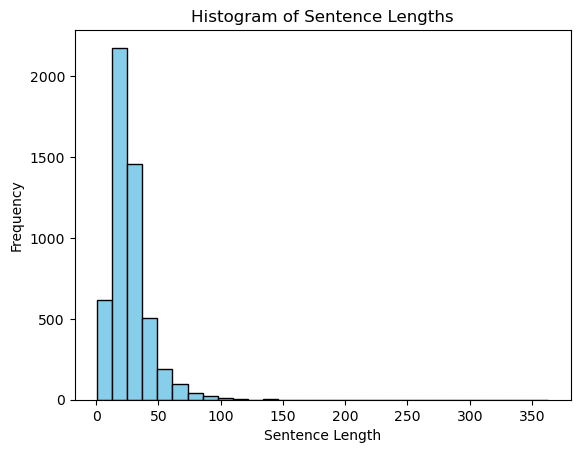

In [90]:
import matplotlib.pyplot as plt
plt.hist(sentence_lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sentence Lengths')
plt.show()

In [91]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [92]:
custom_stop_words = {
    'आप', 'इस', 'इसके', 'इससे', 'इसी', 'उस', 'उसके', 'उससे', 'उसी', 'का',
    'की', 'के', 'को', 'कि', 'किया', 'किये', 'कर', 'करता', 'करते', 'करना',
    'करने', 'किया', 'किये', 'कहा', 'कहे', 'कहीं', 'गया', 'गये', 'जा',
    'जाता', 'जाते', 'जाना', 'जाने', 'तक', 'तब', 'तभी', 'दिया', 'दिये',
    'दिल', 'दिला', 'दे', 'देता', 'देते', 'देना', 'देने', 'ने', 'पहले',
    'पिता', 'पुत्र', 'प्रभु', 'बन', 'बना', 'बनाने', 'बनाया', 'बनाये',
    'बाद', 'बाला', 'बालों', 'बाले', 'भगवान', 'भगवाना', 'भगवानों',
    'भगवानी', 'भाई', 'मैं', 'मेरा', 'मेरी', 'मेरे', 'यह', 'या', 'यहीं',
    'यहाँ', 'यहां', 'ये', 'रक्षक', 'राम', 'ले', 'लिए', 'लिया', 'लेकिन',
    'वह', 'वहाँ', 'वहां', 'वहीं', 'वे', 'श्री','और','से','में','जो','तो','है',
    'तुम','कहा','पर','नहीं'
}

# Tokenize the text and remove custom stop words
words = text.split()
words_without_stopwords = [word for word in words if word.lower() not in custom_stop_words]

# Calculate word frequency without stop words
word_counts = Counter(words_without_stopwords)
top_words = word_counts.most_common(10)  # Get the top 10 most common words

# Display top words
print("Top 10 Most Common Words (without custom stop words):")
for word, count in top_words:
    print(f"{word}: {count} times")







Top 10 Most Common Words (without custom stop words):
है,: 1318 times
न: 1204 times
कहा,: 944 times
भी: 890 times
परमेश्वर: 838 times
क्योंकि: 782 times
परन्तु: 771 times
एक: 767 times
अपने: 741 times
उसने: 738 times


In [93]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=r"C:\Users\Sahil\Downloads\MANGAL\MANGAL.TTF", collocations=False, regexp=r"[\u0900-\u097F]+").generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hindi Bible Text')
plt.show()

C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\3380683313.py:13: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\3380683313.py:13: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\3380683313.py:13: UserWarning: Glyph 87 (W) missing from current font.
  plt.tight_layout()
C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\3380683313.py:13: UserWarning: Glyph 111 (o) missing from current font.
  plt.tight_layout()
C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\3380683313.py:13: UserWarning: Glyph 114 (r) missing from current font.
  plt.tight_layout()
C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\3380683313.py:13: UserWarning: Glyph 100 (d) missing from current font.
  plt.tight_layout()
C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\3380683313.py:13: UserWarning: Glyph 115 (s) missing from current font.
  plt.tight_layout()
C:\User

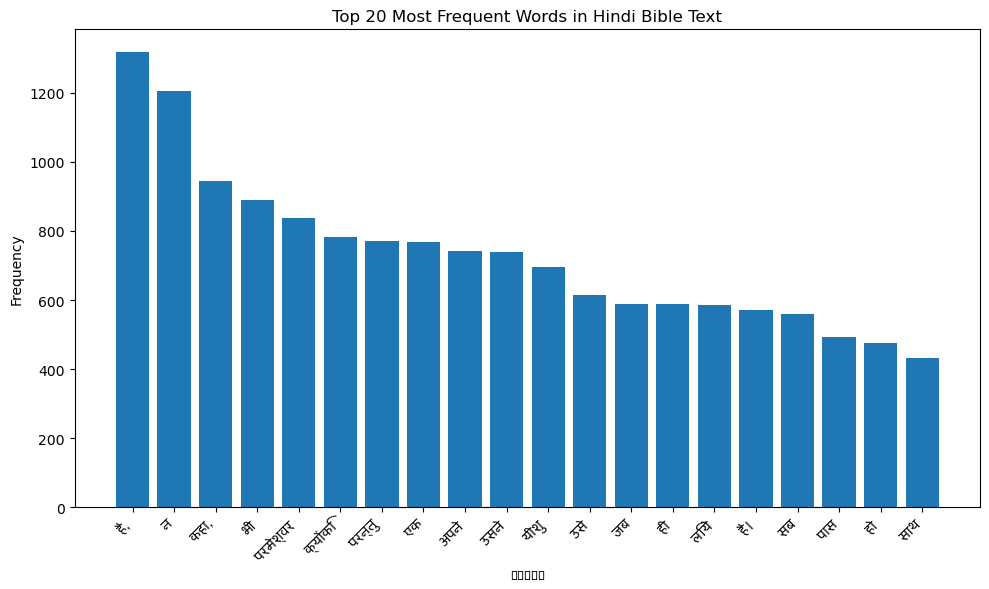

In [94]:
from matplotlib.font_manager import FontProperties
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)
plt.figure(figsize=(10, 6))

# Set font properties for Hindi text
hindi_font = FontProperties(fname=r"C:\Users\Sahil\Downloads\MANGAL\MANGAL.TTF") 
plt.bar(range(20), word_freq_df['Frequency'][:20])
plt.xlabel('Words', fontproperties=hindi_font)
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words in Hindi Bible Text')
plt.xticks(range(20), word_freq_df['Word'][:20], fontproperties=hindi_font, rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\1666966644.py:23: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\1666966644.py:23: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\1666966644.py:23: UserWarning: Glyph 8220 (\N{LEFT DOUBLE QUOTATION MARK}) missing from current font.
  plt.tight_layout()
C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\1666966644.py:23: UserWarning: Glyph 66 (B) missing from current font.
  plt.tight_layout()
C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\1666966644.py:23: UserWarning: Glyph 105 (i) missing from current font.
  plt.tight_layout()
C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\1666966644.py:23: UserWarning: Glyph 103 (g) missing from current font.
  plt.tight_layout()
C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\1666966644.py:23: UserWarning: Glyph 114 (r) missing from current font

C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\1666966644.py:33: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\1666966644.py:33: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\1666966644.py:33: UserWarning: Glyph 8220 (\N{LEFT DOUBLE QUOTATION MARK}) missing from current font.
  plt.tight_layout()
C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\1666966644.py:33: UserWarning: Glyph 84 (T) missing from current font.
  plt.tight_layout()
C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\1666966644.py:33: UserWarning: Glyph 114 (r) missing from current font.
  plt.tight_layout()
C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\1666966644.py:33: UserWarning: Glyph 105 (i) missing from current font.
  plt.tight_layout()
C:\Users\Sahil\AppData\Local\Temp\ipykernel_1660\1666966644.py:33: UserWarning: Glyph 103 (g) missing from current font

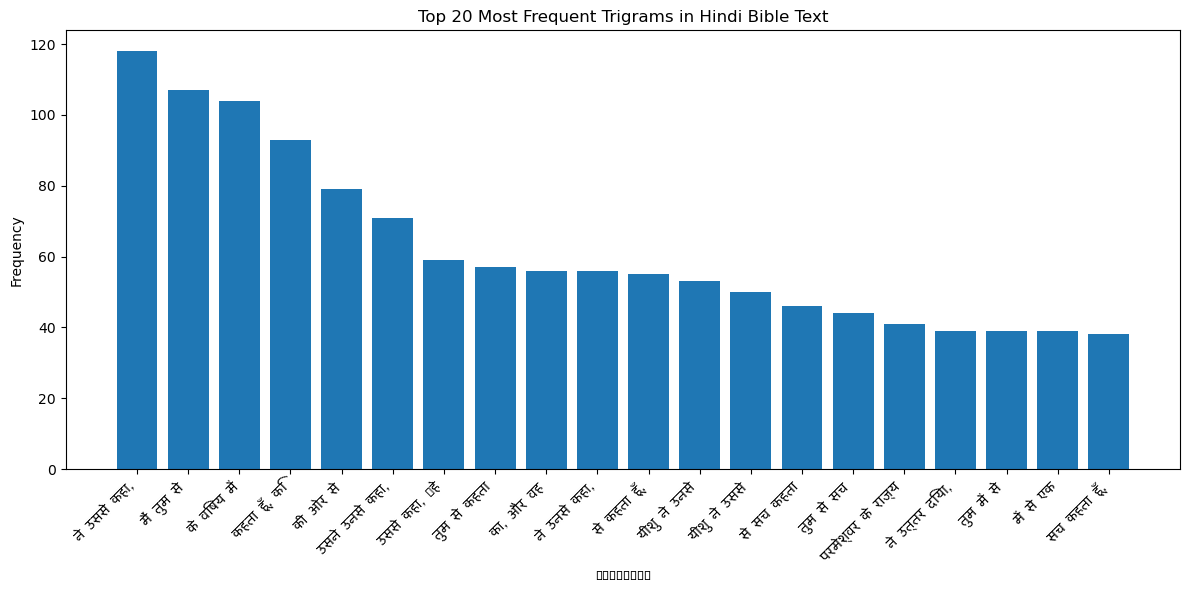

In [95]:
from nltk import bigrams, trigrams, FreqDist
hindi_bigrams = list(bigrams(words))
hindi_trigrams = list(trigrams(words))

# Calculate frequencies of bigrams and trigrams
bigram_freq = FreqDist(hindi_bigrams)
trigram_freq = FreqDist(hindi_trigrams)

# Convert frequencies to DataFrames for plotting
bigram_freq_df = pd.DataFrame(bigram_freq.items(), columns=['Bigram', 'Frequency'])
bigram_freq_df = bigram_freq_df.sort_values(by='Frequency', ascending=False).head(20)

trigram_freq_df = pd.DataFrame(trigram_freq.items(), columns=['Trigram', 'Frequency'])
trigram_freq_df = trigram_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Plot the top 20 most frequent bigrams
plt.figure(figsize=(12, 6))
plt.bar(range(len(bigram_freq_df)), bigram_freq_df['Frequency'])
plt.xlabel('Bigrams',fontproperties=hindi_font)
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Bigrams in Hindi Bible Text')
plt.xticks(range(len(bigram_freq_df)), [' '.join(bigram) for bigram in bigram_freq_df['Bigram']],fontproperties=hindi_font, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the top 20 most frequent trigrams
plt.figure(figsize=(12, 6))
plt.bar(range(len(trigram_freq_df)), trigram_freq_df['Frequency'])
plt.xlabel('Trigrams',fontproperties=hindi_font)
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Trigrams in Hindi Bible Text')
plt.xticks(range(len(trigram_freq_df)), [' '.join(trigram) for trigram in trigram_freq_df['Trigram']],fontproperties=hindi_font, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# SENSTIMENT ANALYSIS

In [96]:
from textblob import TextBlob
sentiments = []
i=0
for word in words[0:10]:
    i+=1
    blob = TextBlob(word)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    sentiments.append((word, sentiment, polarity))

# Print the sentiment analysis results
for word, sentiment, polarity in sentiments:
    print(f'Word: {word}, Sentiment: {sentiment}, Polarity: {polarity}')

Word: 1, Sentiment: Neutral, Polarity: 0.0
Word: अब्राहम, Sentiment: Neutral, Polarity: 0.0
Word: की, Sentiment: Neutral, Polarity: 0.0
Word: सन्तान,, Sentiment: Neutral, Polarity: 0.0
Word: दाऊद, Sentiment: Neutral, Polarity: 0.0
Word: की, Sentiment: Neutral, Polarity: 0.0
Word: सन्तान,, Sentiment: Neutral, Polarity: 0.0
Word: यीशु, Sentiment: Neutral, Polarity: 0.0
Word: मसीह, Sentiment: Neutral, Polarity: 0.0
Word: की, Sentiment: Neutral, Polarity: 0.0


In [97]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Join the list of words into a single string
text_word = ' '.join(words)

# Create a CountVectorizer to convert text into a matrix of token counts
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform([text_word])

# Apply Latent Dirichlet Allocation (LDA) for topic modeling
num_topics =25
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X_counts)

# Display the unique top words for each topic
feature_names = vectorizer.get_feature_names_out()
unique_topics = set()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    unique_topics.add(tuple(top_words))

# Print the unique topics
print("Unique Topics:")
for idx, topic_words in enumerate(unique_topics):
    print(f"Topic {idx + 1}: {', '.join(topic_words)}")


Unique Topics:
Topic 1: आहट, करप, तमण, 80, 82, रबलत, तय, इद, तरण, तह
Topic 2: हस, कव, करव, कल, कलकर, कलत, कलन, कलव, कष, खकर
Topic 3: और, कर, वह, पर, यह, कह, उसक, उस, वर, अपन


In [98]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pydub import AudioSegment

In [99]:
folder_path = r"C:\Users\Sahil\Downloads\audio\audios"
def load_audio_files(folder_path):
    audio_data = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".mp3"):
            file_path = os.path.join(folder_path, filename)
            audio_data.append({
                "filename": filename,
                "audio": AudioSegment.from_mp3(file_path)
            })
    return audio_data

In [100]:
audio_files = load_audio_files(folder_path)

In [104]:
len(audio_files)

260

In [102]:
folder_path1=r"C:\Users\Sahil\Downloads\audio\chapter_text"

In [103]:
text_files = sorted([f for f in os.listdir(folder_path1) if f.endswith('.txt')])

for audio_info, text_file in zip(audio_files, text_files):
    # Print audio file information
    print(f"Filename: {audio_info['filename']}")
    print(f"Sample Rate: {audio_info['audio'].frame_rate} Hz")
    print(f"Channels: {audio_info['audio'].channels}")
    print(f"Bit Depth: {audio_info['audio'].sample_width * 8} bits")
    
    # Print corresponding text file contents
    file_path = os.path.join(folder_path1, text_file)
    with open(file_path, 'r', encoding='utf-8') as file:
        print(f'Contents of {text_file}:')
        print(file.read())
    print('-' * 40)



Filename: audio1.mp3
Sample Rate: 24000 Hz
Channels: 2
Bit Depth: 16 bits
Contents of ch1.txt:
 1 अब्राहम की सन्तान, दाऊद की सन्तान, यीशु मसीह की वंशावली।
 2 अब्राहम से इसहाक उत्पन्न हुआ, इसहाक से याकूब उत्पन्न हुआ, और याकूब से यहूदा और उसके भाई उत्पन्न हुए।
 3 यहूदा और तामार से पेरेस व जेरह उत्पन्न हुए, और पेरेस से हेस्रोन उत्पन्न हुआ, और हेस्रोन से एराम उत्पन्न हुआ।
 4 एराम से अम्मीनादाब उत्पन्न हुआ, और अम्मीनादाब से नहशोन, और नहशोन से सलमोन उत्पन्न हुआ। (रूत 4:19,20)
 5 सलमोन और राहाब से बोअज उत्पन्न हुआ, और बोअज और रूत से ओबेद उत्पन्न हुआ, और ओबेद से यिशै उत्पन्न हुआ।
 6 और यिशै से दाऊद राजा उत्पन्न हुआ। और दाऊद से सुलैमान उस स्त्री से उत्पन्न हुआ जो पहले ऊरिय्याह की पत्नी थी। (2 शमू. 12:24)
 7 सुलैमान से रहबाम उत्पन्न हुआ, और रहबाम से अबिय्याह उत्पन्न हुआ, और अबिय्याह से आसा उत्पन्न हुआ।
 8 आसा से यहोशाफात उत्पन्न हुआ, और यहोशाफात से योराम उत्पन्न हुआ, और योराम से उज्जियाह उत्पन्न हुआ।
 9 उज्जियाह से योताम उत्पन्न हुआ, योताम से आहाज उत्पन्न हुआ, और आहाज से हिजकिय्याह उत्पन्न हुआ।


In [106]:
audio_files

[{'filename': 'audio1.mp3',
  'audio': <pydub.audio_segment.AudioSegment at 0x1e2060d2520>},
 {'filename': 'audio10.mp3',
  'audio': <pydub.audio_segment.AudioSegment at 0x1e2060d2b80>},
 {'filename': 'audio100.mp3',
  'audio': <pydub.audio_segment.AudioSegment at 0x1e2060d2190>},
 {'filename': 'audio101.mp3',
  'audio': <pydub.audio_segment.AudioSegment at 0x1e2060d2ac0>},
 {'filename': 'audio102.mp3',
  'audio': <pydub.audio_segment.AudioSegment at 0x1e2060d2b50>},
 {'filename': 'audio103.mp3',
  'audio': <pydub.audio_segment.AudioSegment at 0x1e2060d2d30>},
 {'filename': 'audio104.mp3',
  'audio': <pydub.audio_segment.AudioSegment at 0x1e2060d2df0>},
 {'filename': 'audio105.mp3',
  'audio': <pydub.audio_segment.AudioSegment at 0x1e2060d21f0>},
 {'filename': 'audio106.mp3',
  'audio': <pydub.audio_segment.AudioSegment at 0x1e2060d2460>},
 {'filename': 'audio107.mp3',
  'audio': <pydub.audio_segment.AudioSegment at 0x1e2060d2400>},
 {'filename': 'audio108.mp3',
  'audio': <pydub.audio

In [107]:
durations = []
sample_rates = []
channels = []

for audio_info in audio_files:
    audio = audio_info['audio']
    
    durations.append(len(audio) / 1000.0)  # Duration in seconds
    sample_rates.append(audio.frame_rate)
    channels.append(audio.channels)

# Plot histograms of audio properties
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.hist(durations, bins=30, color='skyblue')
plt.title('Distribution of Audio Durations (seconds)')

plt.subplot(3, 1, 2)
plt.hist(sample_rates, bins=30, color='salmon')
plt.title('Distribution of Sample Rates (Hz)')

plt.subplot(3, 1, 3)
plt.hist(channels, bins=3, color='lightgreen')
plt.title('Distribution of Channels')

plt.tight_layout()
plt.show()


In [108]:
text_lengths = []
word_counts = []

for text_file in text_files:
    text_path = os.path.join(folder_path1, text_file)
    with open(text_path, 'r', encoding='utf-8') as file:
        text = file.read()
        text_lengths.append(len(text))
        word_counts.append(len(text.split()))

# Plot histograms of text properties
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.hist(text_lengths, bins=30, color='skyblue')
plt.title('Distribution of Text Lengths (characters)')

plt.subplot(2, 1, 2)
plt.hist(word_counts, bins=30, color='salmon')
plt.title('Distribution of Word Counts')

plt.tight_layout()
plt.show()


# Alignment Between Text and Spoken Content

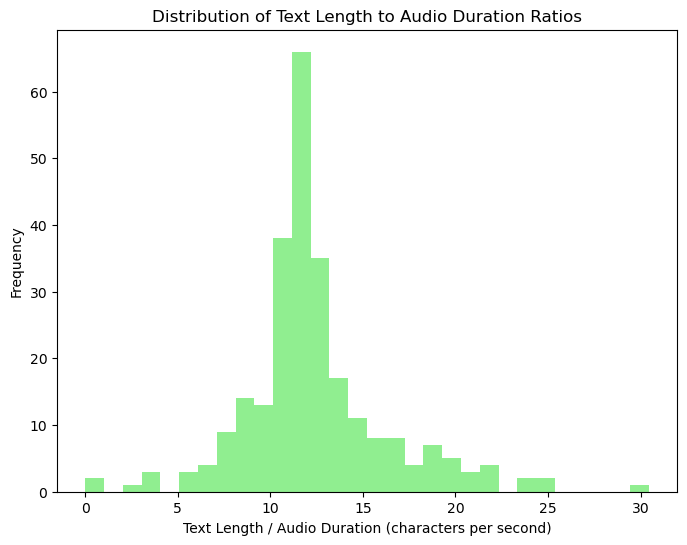

In [109]:
alignment_ratios = []

for i in range(len(audio_files)):
    audio_duration = durations[i]
    text_length = text_lengths[i]
    alignment_ratios.append(text_length / audio_duration)

# Plot the alignment ratio
plt.figure(figsize=(8, 6))
plt.hist(alignment_ratios, bins=30, color='lightgreen')
plt.title('Distribution of Text Length to Audio Duration Ratios')
plt.xlabel('Text Length / Audio Duration (characters per second)')
plt.ylabel('Frequency')
plt.show()


# Anomalies Detection

In [113]:
import seaborn as sns
import numpy as np
from scipy import stats
# Z-score to detect outliers in durations
z_scores = np.abs(stats.zscore(durations))
outliers = np.where(z_scores > 3)

print("Anomalous Audio Files:")
for outlier in outliers[0]:
    print(audio_files[outlier]['filename'])


Anomalous Audio Files:
audio26.mp3
audio96.mp3


# Amplitude Analysis

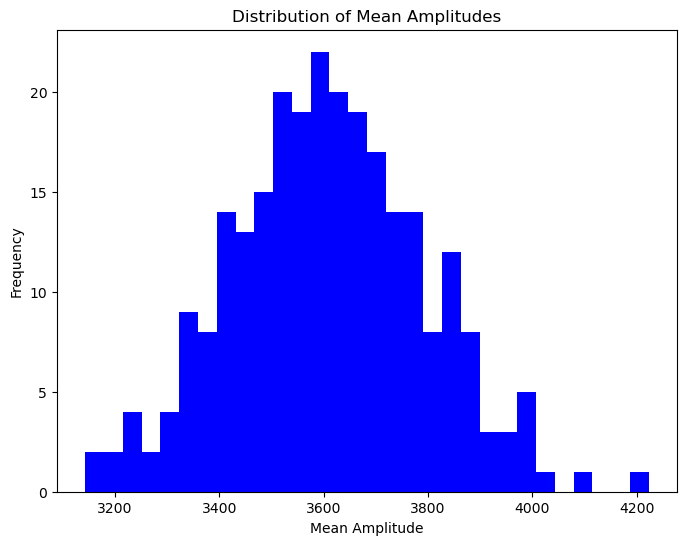

In [114]:
import numpy as np

amplitudes = []

for audio_info in audio_files:
    audio = audio_info['audio']
    samples = np.array(audio.get_array_of_samples())
    amplitudes.append(np.mean(np.abs(samples)))

# Plot histogram of amplitudes
plt.figure(figsize=(8, 6))
plt.hist(amplitudes, bins=30, color='blue')
plt.title('Distribution of Mean Amplitudes')
plt.xlabel('Mean Amplitude')
plt.ylabel('Frequency')
plt.show()


# Frequency Spectrum Analysis

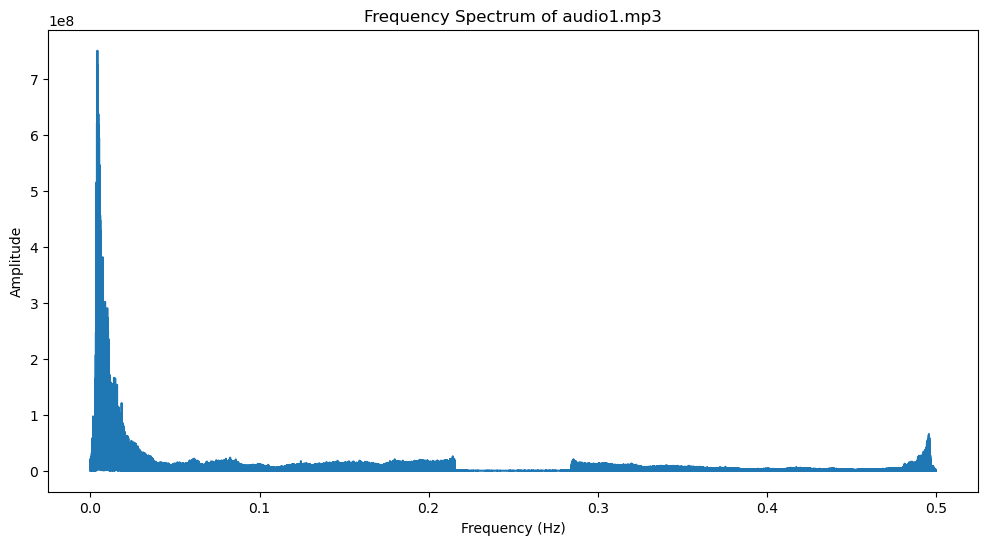

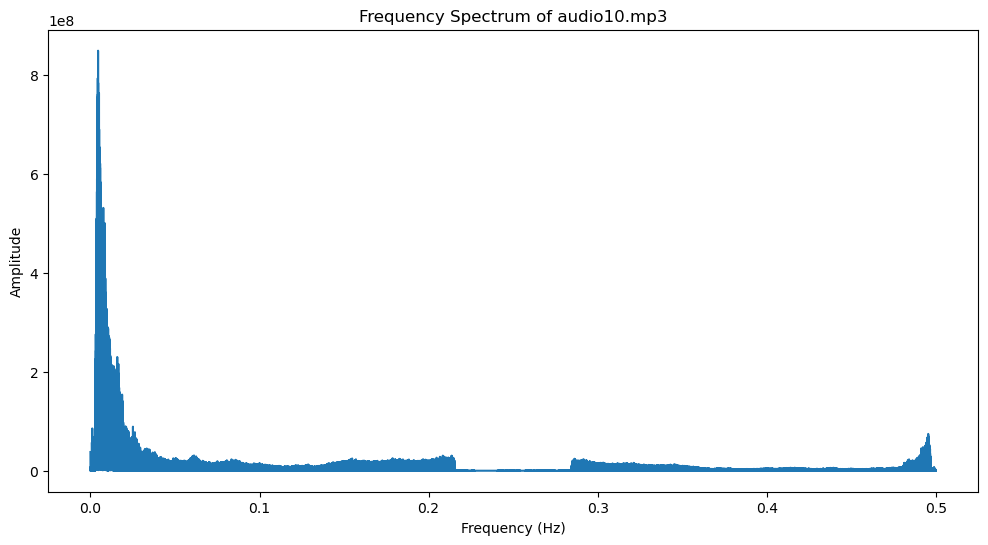

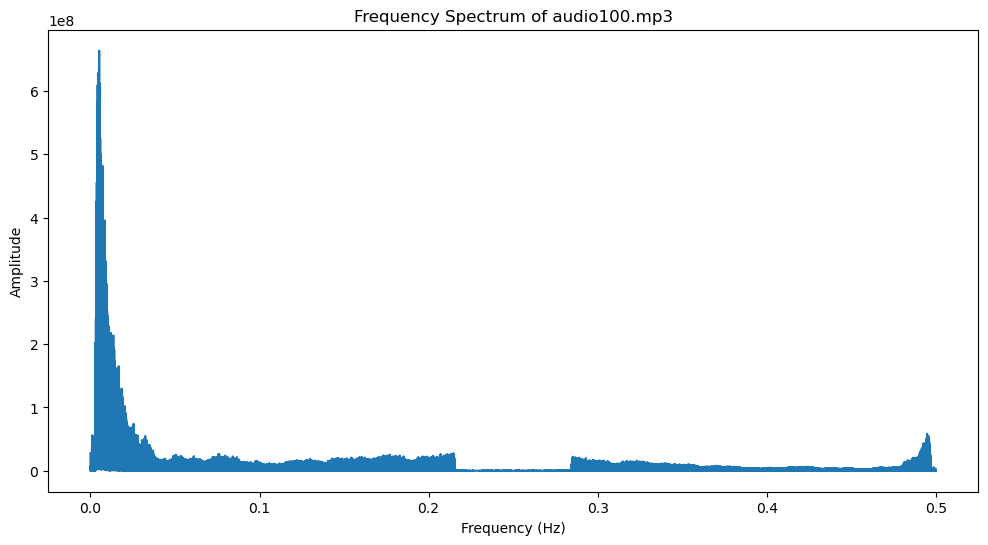

In [115]:
from scipy.fft import fft
import numpy as np

# Function to compute the frequency spectrum
def compute_frequency_spectrum(audio):
    samples = np.array(audio.get_array_of_samples())
    spectrum = np.abs(fft(samples))
    frequencies = np.fft.fftfreq(len(spectrum))
    return frequencies, spectrum

# Analyze the frequency spectrum of the first few audio files
for i in range(min(3, len(audio_files))):  # Analyze first 3 files as an example
    audio = audio_files[i]['audio']
    frequencies, spectrum = compute_frequency_spectrum(audio)
    
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies[:len(frequencies)//2], spectrum[:len(spectrum)//2])
    plt.title(f'Frequency Spectrum of {audio_files[i]["filename"]}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()


# Silence Detection

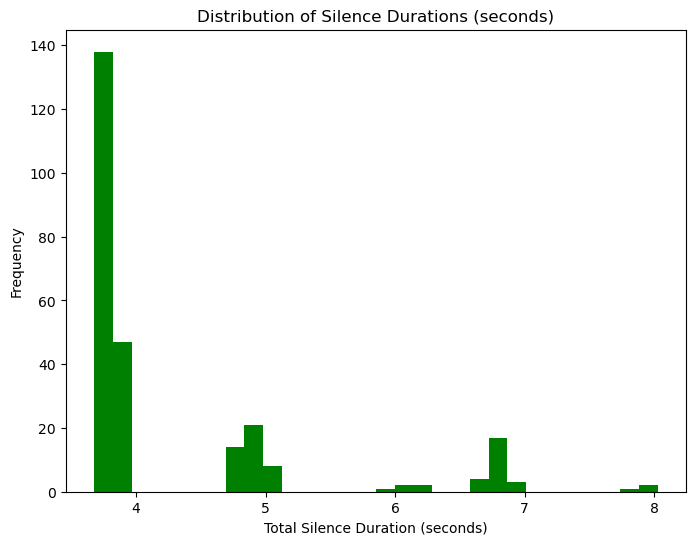

In [116]:
from pydub.silence import detect_silence

silence_durations = []

for audio_info in audio_files:
    audio = audio_info['audio']
    silent_ranges = detect_silence(audio, min_silence_len=1000, silence_thresh=-40)
    total_silence_duration = sum((end - start) for start, end in silent_ranges)
    silence_durations.append(total_silence_duration / 1000.0)  # Duration in seconds

# Plot histogram of silence durations
plt.figure(figsize=(8, 6))
plt.hist(silence_durations, bins=30, color='green')
plt.title('Distribution of Silence Durations (seconds)')
plt.xlabel('Total Silence Duration (seconds)')
plt.ylabel('Frequency')
plt.show()
